In [1]:
import matplotlib
matplotlib.use('agg')
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas

In [2]:
%matplotlib inline

In [3]:
def generate_applicants(N,flag='uniform'):
    if flag == 'integer':
        pool = []
        for i in range(0,N):
            pool.append(np.random.randint(10*N))
        return np.array(pool)
    if flag == 'normal':
        temp          = np.abs(np.random.randn(N))
        return np.floor(temp/np.max(temp)*100.0)/10.0
    if flag == 'uniform':
        return np.floor(np.random.rand(N)*100.0)/10.0
    else:
        print "Didn't understand your specification - using uniform distribution"
        return np.floor(np.random.rand(N)*100.0)/10.0

In [4]:
def find_best_applicant(pool):
    Best_applicant = np.max(pool)
    Ids            = np.where(pool == Best_applicant)[0]
    return Ids, Best_applicant

In [5]:
def stopping_algorithm(pool):
    Num_skip        = int(np.floor(len(pool)/np.e))
    Threshold_score = np.max(pool[0:Num_skip])
    Ids             = np.where(pool >= Threshold_score)[0]
    Valid_Ids       = Ids[Ids > Num_skip]
    Candidates      = pool[Valid_Ids]
    if len(Valid_Ids) != 0:
        return Valid_Ids[0], Threshold_score, Candidates[0]
    else:
        return 'Null',Threshold_score,'Null'

In [6]:
def compute_my_success(N,flag):
    pool                                               = generate_applicants(N,flag)
    best_applicants, best_value                        = find_best_applicant(pool)
    Chosen_applicant, Threshold_score, Candidate_score = stopping_algorithm(pool)
    return len(best_applicants), best_value, Chosen_applicant, Threshold_score, Candidate_score, pool

In [30]:
def calculate_my_odds(N,flag,num_trials):
    total_success   = 0
    partial_success = 0
    blew_it         = 0
    settled         = []
    for i in range(num_trials):
        num_best, best_value, chosen, threshold, chosen_score, pool = compute_my_success(N,flag)
        if chosen_score == 'Null':
            blew_it += 1
        elif chosen_score == best_value:
            total_success += 1
        else:
            partial_success += 1
            settled_val = (1.0 - 1.0*chosen_score/best_value)*100.0
            #print best_value, chosen_score, type(best_value),type(chosen_score), best_value - chosen_score, settled_val
            settled.append(settled_val)
           
    return total_success, partial_success, blew_it, np.array(settled)

In [71]:
my_dict   = {'Method':[],'Num Trials':[],'Num Applicants':[],'% tot':[],'% settle':[],'% blew':[],'settled_data':[]}

In [117]:
num_trials     = 50000
num_applicants = 640
method         = 'uniform'
tot, par, blew, settled = calculate_my_odds(num_applicants,method,num_trials)

In [118]:
my_dict['Method'].append(method)
my_dict['Num Trials'].append(num_trials)
my_dict['Num Applicants'].append(num_applicants)
my_dict['% tot'].append(tot*1.0/num_trials)
my_dict['% settle'].append(par*1.0/num_trials)
my_dict['% blew'].append(blew*1.0/num_trials)
my_dict['settled_data'].append(settled)

In [120]:
my_df = pandas.DataFrame(my_dict)

In [122]:
my_df

,% blew,% settle,% tot,Method,Num Applicants,Num Trials,settled_data
0,0.32438,0.29640,0.37922,integer,10,50000,"[21.5053763441, 3.0612244898, 70.8333333333, 3..."
1,0.35492,0.26614,0.37894,integer,20,50000,"[14.0243902439, 3.55329949239, 5.10204081633, ..."
2,0.34658,0.27420,0.37922,integer,40,50000,"[1.55440414508, 15.3652392947, 16.7539267016, ..."
3,0.35330,0.26302,0.38368,integer,80,50000,"[2.30179028133, 1.37844611529, 1.50187734668, ..."
4,0.35294,0.26710,0.37996,integer,160,50000,"[1.37585991245, 2.5786163522, 1.9472361809, 0...."
5,0.35254,0.26590,0.38156,integer,320,50000,"[1.40712945591, 0.219023779725, 0.879673264216..."
6,0.35564,0.26442,0.37994,integer,640,50000,"[0.0312597686777, 0.187705302675, 0.1877346683..."
7,0.32940,0.30264,0.36796,normal,10,50000,"[42.0, 39.0, 30.0, 10.0, 6.0, 1.0, 51.0, 10.0,..."
8,0.36908,0.27148,0.35944,normal,20,50000,"[18.0, 32.0, 15.0, 45.0, 21.0, 11.0, 30.0, 40...."
9,0.36140,0.27670,0.36190,normal,40,50000,"[27.0, 25.0, 12.0, 34.0, 10.0, 3.0, 9.0, 20.0,..."


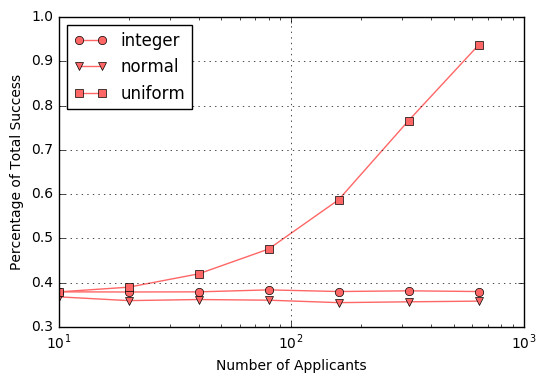

In [142]:
num_app = np.array([10,20,40,80,160,320,640])
tot_int = np.array(my_dict['% tot'][0:7])
tot_nrm = np.array(my_dict['% tot'][7:14])
tot_uni = np.array(my_dict['% tot'][14:21])

plt.semilogx(num_app,tot_int,color='#ff6666',marker='o',label='integer')
plt.semilogx(num_app,tot_nrm,color='#ff6666',marker='v',label='normal')
plt.semilogx(num_app,tot_uni,color='#ff6666',marker='s',label='uniform')
plt.xlabel('Number of Applicants')
plt.ylabel('Percentage of Total Success')
plt.legend(loc='best')
plt.grid('on')

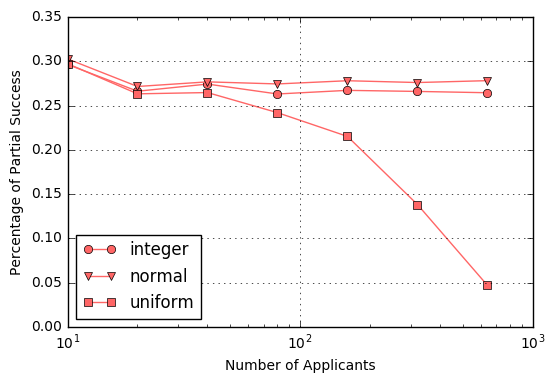

In [143]:
num_app = np.array([10,20,40,80,160,320,640])
par_int = np.array(my_dict['% settle'][0:7])
par_nrm = np.array(my_dict['% settle'][7:14])
par_uni = np.array(my_dict['% settle'][14:21])

plt.semilogx(num_app,par_int,color='#ff6666',marker='o',label='integer')
plt.semilogx(num_app,par_nrm,color='#ff6666',marker='v',label='normal')
plt.semilogx(num_app,par_uni,color='#ff6666',marker='s',label='uniform')
plt.xlabel('Number of Applicants')
plt.ylabel('Percentage of Partial Success')
plt.legend(loc='best')
plt.grid('on')

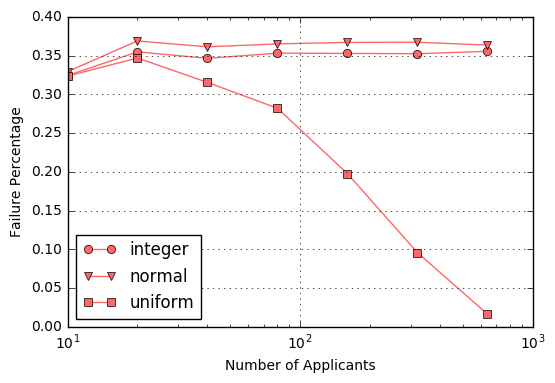

In [144]:
num_app = np.array([10,20,40,80,160,320,640])
blw_int = np.array(my_dict['% blew'][0:7])
blw_nrm = np.array(my_dict['% blew'][7:14])
blw_uni = np.array(my_dict['% blew'][14:21])

plt.semilogx(num_app,blw_int,color='#ff6666',marker='o',label='integer')
plt.semilogx(num_app,blw_nrm,color='#ff6666',marker='v',label='normal')
plt.semilogx(num_app,blw_uni,color='#ff6666',marker='s',label='uniform')
plt.xlabel('Number of Applicants')
plt.ylabel('Failure Percentage')
plt.legend(loc='best')
plt.grid('on')

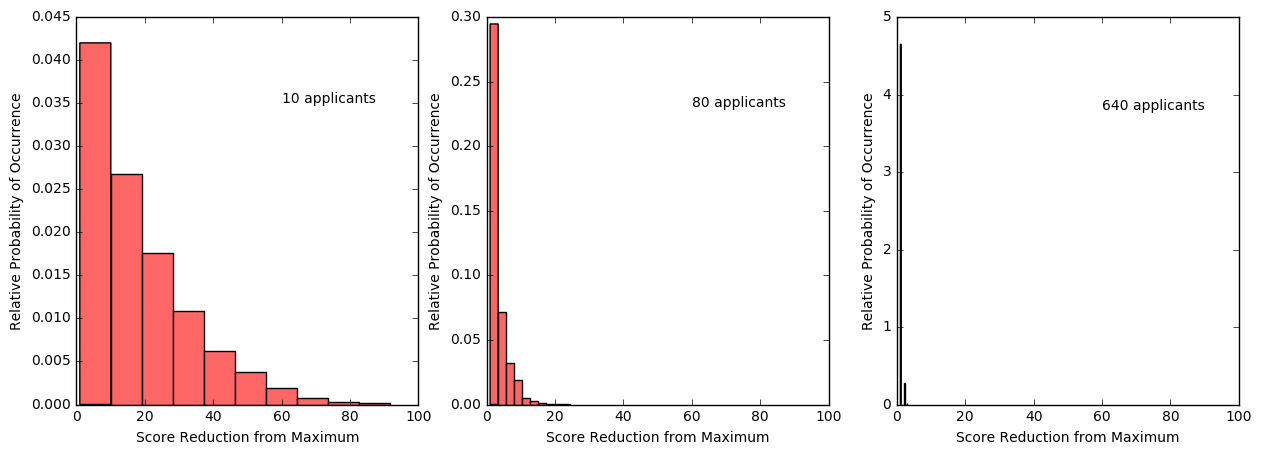

In [157]:
fig1 = plt.figure(figsize=(15,5))
ax1  = fig1.add_subplot(131)
ns, bins, rects = ax1.hist(my_dict['settled_data'][14],normed=True,color='#ff6666')
ax1.set_xlabel('Score Reduction from Maximum')
ax1.set_ylabel('Relative Probability of Occurrence')
ax1.set_xlim([0,100])
ax2  = fig1.add_subplot(132)
ns, bins, rects = ax2.hist(my_dict['settled_data'][17],normed=True,color='#ff6666')
ax2.set_xlabel('Score Reduction from Maximum')
ax2.set_ylabel('Relative Probability of Occurrence')
ax2.set_xlim([0,100])
ax3  = fig1.add_subplot(133)
ns, bins, rects = ax3.hist(my_dict['settled_data'][20],normed=True,color='#ff6666')
ax3.set_xlabel('Score Reduction from Maximum')
ax3.set_ylabel('Relative Probability of Occurrence')
ax3.set_xlim([0,100])
ax1.annotate('10 applicants', xy=(60,0.035))
ax2.annotate('80 applicants', xy=(60,0.230))
ax3.annotate('640 applicants',xy=(60,3.8))
plt.show()

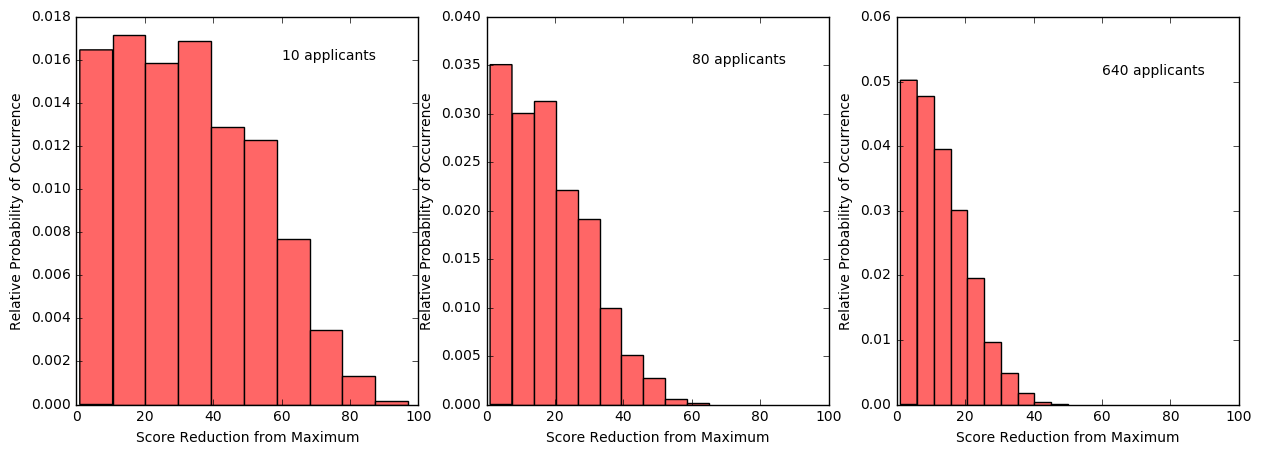

In [164]:
fig2 = plt.figure(figsize=(15,5))
ax12 = fig2.add_subplot(131)
ns, bins, rects = ax12.hist(my_dict['settled_data'][7],normed=True,color='#ff6666')
ax12.set_xlabel('Score Reduction from Maximum')
ax12.set_ylabel('Relative Probability of Occurrence')
ax12.set_xlim([0,100])
ax22 = fig2.add_subplot(132)
ns, bins, rects = ax22.hist(my_dict['settled_data'][10],normed=True,color='#ff6666')
ax22.set_xlabel('Score Reduction from Maximum')
ax22.set_ylabel('Relative Probability of Occurrence')
ax22.set_xlim([0,100])
ax32 = fig2.add_subplot(133)
ns, bins, rects = ax32.hist(my_dict['settled_data'][13],normed=True,color='#ff6666')
ax32.set_xlabel('Score Reduction from Maximum')
ax32.set_ylabel('Relative Probability of Occurrence')
ax32.set_xlim([0,100])
ax12.annotate('10 applicants', xy=(60,0.016))
ax22.annotate('80 applicants', xy=(60,0.0352))
ax32.annotate('640 applicants',xy=(60,0.051))
plt.show()

In [166]:
print 1.0/np.e;

0.367879441171
